#**Quantum Mechanics / Molecular Mechanics (QM/MM) Calculations**




**Introduction**  


▶ Combined QM/MM approaches are used for modelling chemical reactions in biomolecular systems.    
▶ Chemical reactions and electronic properties (e.g: Charge transfer processes) are described through QM methods.    
 


**Big picture of the QM/MM model in biomolecualr system**

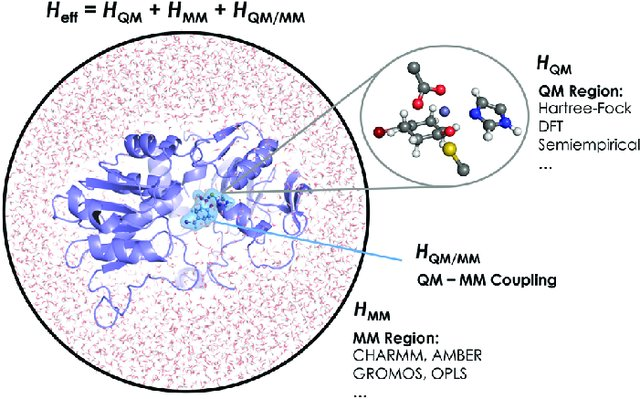     
Figure 1: QM/MM approach of a biomolecular environment   
(Source: Romero-Rivera, A., Garcia-Borràs, M. and Osuna, S., 2017. Computational tools for the evaluation of laboratory-engineered biocatalysts. *Chemical Communications*, 53(2), pp.284-297)

The logical approach of QM/MM model in large biological systems is to;
*   use a **QM** method for **chemically active** sites and
*   an **MM** treatment for **surrounding** regions.



**Potential Energy of System**   
The potential energy $E_\mathrm{sys}$ of the system consisting of both QM and MM regions is;

\begin{align}
E_\mathrm{sys} = E_\mathrm{QM} + E_\mathrm{MM} + E_\mathrm{QM/MM}
\end{align}

**Potential Energy of MM region**   
The potential energy ($E_\mathrm{MM}$) of the MM region

\begin{align}
E_\mathrm{bonded} & = E_\mathrm{bond} + E_\mathrm{angle} + E_\mathrm{torsion} \\
E_\mathrm{nonbonded} & = E_\mathrm{LJ} + E_\mathrm{Coul} \\
E_\mathrm{LJ} & = \sum_{A>B} 4 \epsilon_{AB} 
\left[ \left( \frac{\sigma_{AB}}{R_{AB}} \right)^{12}
- \left( \frac{\sigma_{AB}}{R_{AB}} \right)^{6}
\right] \\
E_\mathrm{Coul} & = \sum_{A>B} \frac{q_A q_B}{R_{AB}}
\end{align}

where $R_{AB} = |\pmb{R}_B - \pmb{R}_A|$ 

$\epsilon$, $\sigma$, and $q$ are MM force field parameters. The parameters will depend on the choice of **biomolecular force field**, which include:


1. AMBER
2. CHARMM
3. MMFF
4. OPLS
5. AMOEBA



**Potential Energy of QM region**  
**$\color{blue} {\text{Born-Oppenheimer Approximation}}$** : This is a well established mathematical approximation used in Quantum Mechanics (QM). This describes the electrons neglecting the motion of the nucleus. The underlying physical basis is that the mass of nucleus is much larger than that of an electron. **The density of electron $\rho_\mathrm{elec} (r)$ in a molecule is obtained in the field of fixed nuclei**.

\begin{align}
\hat{H}_\mathrm{elec} & =  - \sum_{i=1}^N \frac{1}{2} \nabla_i^2 - \sum_{i=1}^N\sum_{A=1}^M \frac{Z_A}{|\pmb{r}_i - \pmb{R}_A|}  + \sum_{i = 1}^N \sum_{j>i}^N \frac{1}{|\pmb{r}_i - \pmb{r}_j|} \\
E_\mathrm{elec} & =  \langle \Psi_\mathrm{elec} | \hat{H}_\mathrm{elec} | \Psi_\mathrm{elec} \rangle \\
E_\mathrm{QM} & =  E_\mathrm{elec} + \sum_{A = 1}^M \sum_{B>A}^M \frac{1}{|\pmb{R}_A - \pmb{R}_B|} 
\end{align}

**Calculating $E_\mathrm{QM}$**

Now, we will execute a calculation to estimate $E_\mathrm{QM}$ at HF and MP2 level of theory.  
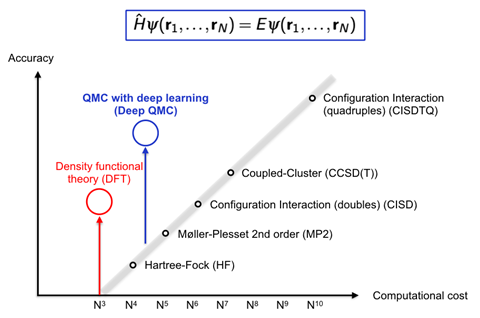       
Figure 2: QM Theory levels. (Source: Article on quantum chemistry simulations. [Link](https://www.chemistryworld.com/news/quantum-chemistry-simulations-offers-beguiling-possibility-of-solving-chemistry/4011541.article)  )

#**Part 0 - Installing pyscf**

**Installing pyscf** (Python-based Simulations of Chemistry Framework for QM eletronic structure calculation)  
Execute:   
!pip install pyscf   
!pip install -U pyberny

In [27]:
!pip install pyscf
!pip install -U pyberny

  Using cached pyscf-2.0.1-cp37-cp37m-manylinux1_x86_64.whl (37.5 MB)
     |████████████████████████████████| 4.1 MB 3.8 MB/s 


  Using cached pyberny-0.6.3-py3-none-any.whl (27 kB)


In [3]:
#Install conda using the new conda-colab library
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:29
🔁 Restarting kernel...


In [1]:
#Install Ambertools, openbabel, and openmm
!conda install -c conda-forge ambertools openbabel openmm --yes

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ambertools
    - openbabel
    - openmm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    ambert

In [2]:
from pyscf import gto, scf, mp, qmmm
from pyscf.geomopt.berny_solver import optimize
import numpy as np

If you are running this code with a GPU, you should use CUDA to perform the molecular mechanics calculations. Otherwise use the CPU platform.

In [36]:
OpenMM_Platform = 'CPU'
# OpenMM_Platform = 'CUDA'

#**Part I - Calculations with water**

**Build a Molecule**

gto : Gaussian-Type Orbital: $\phi_{p_y} =  y \exp(-[x^2+y^2+z^2])$ : Basis Set

scf : Self-Consistent Field (HF)     

**Note**: In electronic structure theory, the level of theory 
has two degrees of freedom: one is the treatment of electron correlation, and the other is the basis set. Basis set is a set of functions combined linearly to generate molecular orbitals (mostly atomic orbitals centred on atoms).

To learn more about the basis sets, click [here](https://gaussian.com/basissets/).

Execute the below given command to build a water molecule.

In [3]:
mol = gto.Mole()
mol.verbose = 0
#mol.output = 'out_h2o'
mol.atom = '''
 O     0.870717    -1.720662    -0.481407
 H     1.689790    -1.221338    -0.305275
 H     1.142439    -2.587970    -0.779946
'''
mol.basis = 'aug-cc-pvdz'
#mol.charge = 0
#mol.symmetry = 1
mol.build()


**Hartree-Fock Method**

Here the motion of electron is decribed by a molecular orbital. Hartree-Fock (HF) is an example of self-consistent field (SCF) method. HF methods is an approximation to the electronic Schrödinger equation where each electron experiences only the average Coulomb repulsion of all the other electrons.

Degree of freedom of the electron spin is not taken into account, so the equations do not satisfy the Pauli Exclusion Principle. It is assumed that all electrons are independent, and a given electron interacts with the other electrons only through the mean field Coulomb potential. 

**Hartree Energy Unit**



Atomic fundamental physical constant used as atomic unit of energy:  

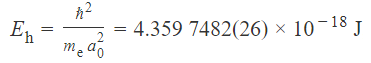


where ℏ is the Planck constant divided by 2 π, $m_e$ the electron rest mass and $a_0$ the Bohr radius.

Used as an energy unit in atomic physics & computational chemistry.

Execute the below given command

In [4]:
# Estimate Potential Energy and Gradients
#mf : represents 'mean-field'
mf_hf = scf.RHF(mol).run()
print ('HF energy in Hartree', mf_hf.e_tot)
grds_QM = mf_hf.Gradients().kernel()
print ('Gradient at HF', grds_QM)

HF energy in Hartree -76.04059295088084
Gradient at HF [[-0.02967821 -0.00505002 -0.00187473]
 [ 0.02741887  0.01892595  0.00666013]
 [ 0.00225933 -0.01387593 -0.00478539]]


In [5]:
# Peform the Geometry Optimization and get the optimized (minimized) potential energy
mol_eq = optimize(mf_hf)
print(mol_eq.atom_coords())
mf_hf_eq = scf.RHF(mol_eq).run()
ener_monomer_min = mf_hf_eq.e_tot
print ('Minimized HF energy in Hartree', mf_hf_eq.e_tot)

[[ 1.66194451 -3.24500544 -0.90738322]
 [ 3.16721622 -2.34339708 -0.58923425]
 [ 2.16839306 -4.86172626 -1.46388039]]
Minimized HF energy in Hartree -76.04184355924042


**Calculating Intra-molecular Potential Energy**

\begin{align}
E^\mathrm{intra} = \sum_i E_i - E_i^\mathrm{min} = \sum_\mathrm{bond_k} E_k + \sum_\mathrm{angle_k} E_k + \sum_\mathrm{torsion_k} E_k
\end{align}   

Execute the below given command;

In [6]:
print ('Intramolecular Potential Energy', mf_hf.e_tot - mf_hf_eq.e_tot)

Intramolecular Potential Energy 0.0012506083595837936


**MP2 Level Calculation**  
Møller-Plesset Perturbation Theory is a widely used method for approximating the correlation energy of molecules. In particular, second order Møller-Plesset perturbation theory (MP2) is one of the simplest and most useful levels of theory beyond the Hartree-Fock approximation.

Execute the following;

In [7]:
postmf = mp.MP2(mf_hf).run()

print ('MP2 energy in Hartree', postmf.e_tot)
print ('MP2 correlation energy ', postmf.e_tot - mf_hf.e_tot)
grds_QM = postmf.Gradients().kernel()
print ('Gradient at MP2', grds_QM)

MP2 energy in Hartree -76.26306516368777
MP2 correlation energy  -0.22247221280693452
Gradient at MP2 [[-0.00150183 -0.0150226  -0.00519808]
 [ 0.00740717  0.00865684  0.00302397]
 [-0.00590533  0.00636577  0.00217411]]


**Combined QM/MM Approach**

▶ The electron density of a molecule in QM is perturbed by 
the embedding field ($\{ q_B \}$) in MM.

\begin{align}
\hat{H}_\mathrm{QM:MM} =\hat{H}_{I:Q_I} & =  \hat{H}_{I} +  \sum_{A \in I} \sum_{B \in Q_I} \frac{Z_A q_B}{|\pmb{R}_A - \pmb{R}_B|}  - \sum_{i \in I} \sum_{B \in Q_I} \frac{q_B}{|\pmb{r}_i - \pmb{R}_B|} \\
E_\mathrm{QM/MM} & = \langle \Psi_{I:Q_I} | \hat{H}_{I:Q_I} | \Psi_{I:Q_I} \rangle
\end{align}

▶ $\Psi_{I:Q_I}$ is the ground-state electronic wave function of an embedded molecule. 

▶ The embedding field affects the electron density of a molecule  according to interaction between electrons in QM and charges $\{q_B \}$ in MM:  $|\Psi_{I:Q_I}|^2 \neq |\Psi_I|^2$    


Execute the following command;

In [8]:
# MM Coordinates
mm_coords = np.array ([
   [ -0.739828,    0.404042,   -1.654300],
   [ -0.272313,   -0.431908,   -1.528862],
   [ -1.614079,    0.247681,   -1.263516],
   [  0.583010,    1.747649,    0.237412],
   [  0.067638,    1.388447,   -0.522507],
   [  0.492157,    2.699374,    0.198453],
   [ -0.691372,   -0.486623,    1.662094],
   [ -0.196696,   -1.092424,    1.095426],
   [ -0.275026,    0.366763,    1.487915],
   [  2.806577,    0.107881,    0.110541],
   [  2.167450,    0.835600,    0.198078],
   [  3.312599,    0.107696,    0.923627],
   [ -2.902522,    0.004488,    0.074388],
   [ -2.270920,   -0.248552,    0.771495],
   [ -3.659225,   -0.571176,    0.176758]
])
# A MM charge on each MM particle
mm_charges= np.array([
  -0.87270,
   0.41814,
   0.45456,
  -0.82369,
   0.48143,
   0.34226,
  -0.83501,
   0.41222,
   0.42279,
  -0.80161,
   0.41908,
   0.38253,
  -0.82897,
   0.43249,
   0.39648                      
])                 

mf_qmmm = qmmm.mm_charge(mf_hf, mm_coords, mm_charges)
mf_qmmm.run()

print ('QM/MM energy', mf_qmmm.e_tot)

QM/MM energy -76.07488238374111


**Electronic Energy between a molecule and the embedding field ($\{q_B\}$)** 
 
\begin{align}
E_I^\mathrm{elec} & =  \langle \Psi_{I:Q_I} | \hat{H}_{I:Q_I} | \Psi_{I:Q_I} \rangle
            - \langle \Psi_{I} | \hat{H}_{I} | \Psi_{I} \rangle 
\end{align}

**Polarization Energy**

\begin{align}
E_I^\mathrm{pol} & =  \langle \Psi_{I:Q_I} | \hat{H}_{I:Q_I} | \Psi_{I:Q_I} \rangle
            - \langle \Psi_{I} | \hat{H}_{I:Q_I} | \Psi_{I} \rangle 
\end{align}

**Coulomb interaction between a molecule and the embedding field**
\begin{align}
E_{I:Q_I}^\mathrm{Coul} = \langle \Psi_I | \sum_{A \in I} \sum_{B \in Q_I} \frac{Z_A q_B}{|\pmb{R}_A - \pmb{R}_B|}  - \sum_{i \in I} \sum_{B \in Q_I} \frac{1}{|\pmb{r}_i - \pmb{R}_B|} | \Psi_I \rangle
\end{align}


Execute the following commands to deduce these energies;

In [9]:
e_elec = mf_qmmm.e_tot - mf_hf.e_tot
print ('Eelec', e_elec)
# Get dm_hf = <\Psi_I| \Psi_I>
dm_hf = mf_hf.make_rdm1()
# Get a polarization energy
e_pol = mf_qmmm.e_tot - mf_qmmm.energy_tot(dm_hf)
print ('Epol ', e_pol)

print ('Ecoul', e_elec - e_pol)

Eelec -0.03428943286027675
Epol  -0.0037265589004675803
Ecoul -0.030562873959809167


#**Part II - QM/MM calculation for a biomolecular system (catalytic triad)**

**Introduction**  
TEV protease (PDB ID: [1LVM](https://www.rcsb.org/structure/1lvm)) utilizes a “catalytic triad” of
residues to catalyze peptide hydrolysis. However, in TEV protease the serine nucleophile of the conventional Ser-Asp-His triad is a cysteine instead. A catalytic triad is a set of three coordinated amino acids that can be found in the active site of some enzymes. 

**Catalytic triad**  
- An Acid-Base-Nucleophile triad is a motif.  
- Acid residues: aspartate, glutamate   
- Base residue: histidine
- Nucleophile residues: serine (-OH) or cysteine (-SH)

**Reactions**
1. Proton transfer
2. Nucleophilic attack

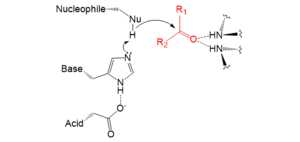   
The triad system with proton tranfer and Nu attack   
(Source: https://en.wikipedia.org/wiki/Catalytic_triad)



#**Step 0**: Setting up input files and working directory

In [10]:
from google.colab import drive
drive.mount('/content/drive')

GitHub_dir = '/content/drive/MyDrive/GitHub'
import os
if not os.path.isdir(GitHub_dir):
  !mkdir -p {GitHub_dir}

os.chdir(GitHub_dir)
if not os.path.isdir(os.path.join(GitHub_dir,'modelingworkshop')):
  !git clone https://github.com/CCBatIIT/modelingworkshop
else:
  os.chdir(os.path.join(GitHub_dir,'modelingworkshop'))
  !git pull origin main

Mounted at /content/drive
From https://github.com/CCBatIIT/modelingworkshop
 * branch            main       -> FETCH_HEAD
Already up to date.


In [11]:
import os

labs_dir = '/content/drive/MyDrive/GitHub/modelingworkshop/labs-complete'
lab_dir = os.path.join(labs_dir, '3-2')
if not os.path.isdir(lab_dir):
  os.mkdir(lab_dir)
os.chdir(lab_dir)

# CONTENT SPECIFIC TO LAB
if not os.path.isdir('./modelingworkshop_syoo'):
  !git clone https://github.com/swillow/modelingworkshop modelingworkshop_syoo

if not os.path.isdir('./pdb2amber'):
  !git clone https://github.com/swillow/pdb2amber

mpro_pdb = '../1-2/bestmodel_aligned.pdb'
os.path.isfile(mpro_pdb), os.path.isdir('./modelingworkshop_syoo/QMMM'), os.path.isdir('./pdb2amber/build_system')

Cloning into 'modelingworkshop_syoo'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 309 (delta 132), reused 260 (delta 83), pack-reused 0
Receiving objects: 100% (309/309), 32.94 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Cloning into 'pdb2amber'...
remote: Enumerating objects: 333, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 333 (delta 84), reused 104 (delta 42), pack-reused 176
Receiving objects: 100% (333/333), 9.57 MiB | 8.20 MiB/s, done.
Resolving deltas: 100% (179/179), done.


(True, True, True)

#**Step 1**: Add hydrogen atoms to a protein (using pdb2pqr)

**1.a**  Installation                 
Execute: pip install pdb2pqr


In [12]:
!pip install pdb2pqr

     |████████████████████████████████| 207 kB 4.2 MB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
     |████████████████████████████████| 575 kB 44.2 MB/s 


**1.b** Adding H atoms    
Execute: pdb2pqr30 --ff AMBER --with-ph=7 --nodebump --ffout=AMBER ../TEV/1lvm_A.pdb ../TEV/1lvm_A_H.pqr


In [13]:
!pwd
#!ls -l modelingworkshop_syoo/exercise/TEV/

/content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2


In [14]:
!pdb2pqr30 --help | head -n15

usage: pdb2pqr [-h] [--ff {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}]
               [--userff USERFF] [--clean] [--nodebump] [--noopt]
               [--keep-chain] [--assign-only]
               [--ffout {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}]
               [--usernames USERNAMES] [--apbs-input APBS_INPUT]
               [--pdb-output PDB_OUTPUT] [--ligand LIGAND] [--whitespace]
               [--neutraln] [--neutralc] [--drop-water] [--include-header]
               [--titration-state-method {propka}] [--with-ph PH]
               [-f FILENAMES] [-r REFERENCE] [-c CHAINS] [-i TITRATE_ONLY]
               [-t THERMOPHILES] [-a ALIGNMENT] [-m MUTATIONS] [-p PARAMETERS]
               [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [-o PH]
               [-w WINDOW WINDOW WINDOW] [-g GRID GRID GRID]
               [--mutator MUTATOR] [--mutator-option MUTATOR_OPTIONS] [-d]
               [-l] [-k] [-q] [--protonate-all] [--version]
               input_path output_pqr


In [15]:
in_pdb, out_pqr, out_pdb = lab_dir+'/modelingworkshop_syoo/exercise/TEV/1lvm_A.pdb',lab_dir+'/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.pqr',lab_dir+'/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.pdb'
#!scp {mpro_pdb} ./mpro.pdb
#in_pdb, out_pqr, out_pdb = '.pro.pdb', 'mpro_H.pqr', 'mpro_H.pdb'
!pdb2pqr30 --ff=AMBER --with-ph=7 --nodebump --ffout=AMBER --pdb-output={out_pdb} {in_pdb} {out_pqr}

INFO:PDB2PQR v3.5.2: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 221 residues and 1753 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:Attempting to repair 15 missing atoms in biomolecule.
INFO:Added atom CG to residue GLU A 2 at coordinates 35.814, 65.362, 9.021
INFO:Added atom CD to residue GLU A 2 at coordinates 37.

**1.c**  Converting a pqr file to a pdb file  
Execute: python pqr2pdb.py -i ../TEV/1lvm_A_H.pqr -o ../TEV/protein.pdb
**May not work**

#**Step 2**: Generating an amber Parameter/topology file (prmtop) for QM/MM system (using pdb2amber.py)


Execute the following command:   
python ~/Workshop/pdb2amber/pdb2amber.py -i input.json


In [18]:
import json
sample_json = json.load(open(lab_dir+'/pdb2amber/input.json', 'r'))
for key in sample_json:
  print(f'{key}: {sample_json[key]}')

fname_pdb: receptor.pdb
fname_prmtop: receptor.prmtop
fname_ff: ['./data/protein.ff14SB.xml', './data/wat_opc3.xml']


In [19]:
protein_prmtop = out_pdb.replace('.pdb','.prmtop')
protein_inpcrd = out_pdb.replace('.pdb','.inpcrd')

sample_json['fname_pdb'] = out_pdb
sample_json['fname_prmtop'] = protein_prmtop
sample_json['inpcrd_fname'] = protein_inpcrd
#sample_json['fname_ff'].append(AN_XML)
#THESE HAVE ..'s because they need to be relative to the pdb2amber.py script located within the pdb2amber/ directory

for key in sample_json:
  print(f'{key}: {sample_json[key]}')

fname_pdb: /content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.pdb
fname_prmtop: /content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.prmtop
fname_ff: ['./data/protein.ff14SB.xml', './data/wat_opc3.xml']
inpcrd_fname: /content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.inpcrd


In [20]:
os.chdir(lab_dir+'/pdb2amber')
pdb2amber_json_fname = 'protein.json'
json.dump(sample_json, open(pdb2amber_json_fname, 'w'))

!python pdb2amber.py -i {pdb2amber_json_fname}

file_names ./data/protein.ff14SB.xml
file_names ./data/wat_opc3.xml
qm_res_atoms []
tot_chg  5.000000000000023


#**Step 3**: Minimizing the protein structure within the QMMM system (using qmmm_pol.py)


In [33]:
os.chdir(lab_dir + '/modelingworkshop_syoo/exercise/step3_MM_Min/')
!cat input.json

{
    "theory": "qmmm",
    "_job_info": "choose either ener, opt, or mm_opt",
    "job": "mm_opt",
    "geom": {
        "ligand": "../TEV/ligand_short.pdb",
        "protein": "../TEV/protein2.pdb",
        "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'",
        "qm_residues": {
            "LIG1": 0,
            "CYS151": 0,
            "HID46": 0
        },
        "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]",
        "constraints": [ ["CYS151:HG","HID46:NE2", 0.0, 1.0],
		["CYS151:SG","LIG1:C4", 0.0, 1.8]
        ]
    },
    "qm": {
	"_method_info" : "rhf is supported",
        "method": "rhf",
	"_basis_info" : "provide basis set",
        "basis": "6-31gs",
        "esp_opts": {
            "resp": true,
            "resp_hfree": true
        }
    },
    "mm": {
	"_mm_info" : "MM energy and gradients are estimated via OpenMM",
        "Platform": "CPU",
	"_fname_prmtop_inf

In [34]:
# LOAD the given json file
sample_json = json.load(open('input.json','r'))#lab_dir + '/modelingworkshop_syoo/exercise/step3_MM_Min/input.json', 'r'))

# CHANGE necessary file names to run the code
sample_json['geom']['protein'] = out_pdb
sample_json['mm']['fname_prmtop'] = protein_prmtop

sample_json['mm']['Platform'] = OpenMM_Platform

# SAVE the new json
step3_json_fname = 'step3.json'
json.dump(sample_json, open(step3_json_fname, 'w'))
!cat step3.json

# If you feel like trying 
# !python {lab_dir}/modelingworkshop_syoo/QMMM/qmmm_pol.py -i input.json

{"theory": "qmmm", "_job_info": "choose either ener, opt, or mm_opt", "job": "mm_opt", "geom": {"ligand": "../TEV/ligand_short.pdb", "protein": "/content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.pdb", "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'", "qm_residues": {"LIG1": 0, "CYS151": 0, "HID46": 0}, "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]", "constraints": [["CYS151:HG", "HID46:NE2", 0.0, 1.0], ["CYS151:SG", "LIG1:C4", 0.0, 1.8]]}, "qm": {"_method_info": "rhf is supported", "method": "rhf", "_basis_info": "provide basis set", "basis": "6-31gs", "esp_opts": {"resp": true, "resp_hfree": true}}, "mm": {"_mm_info": "MM energy and gradients are estimated via OpenMM", "Platform": "CPU", "_fname_prmtop_info": "MM force field is provided in an AMBER prmtop format", "fname_prmtop": "/content/drive/MyDrive/GitHub/modelingworksho

In [35]:
!python ../../QMMM/qmmm_pol.py -i step3.json

../../QMMM/qmmm_pol.py:246: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grds_qm = np.zeros(qm_crds.shape, dtype=np.float)
../../QMMM/qmmm_pol.py:247: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grds_prt = np.zeros(prt_crds.shape, dtype=np.float)
cycle    1: E_sys     0.062531 E_prt    -4.132566 E_QMMM_vdw     4.195097
cycle    2: E_sy

#**Step 4**: Calculating the potential energy and gradients of the QM/MM system (using qmmm_pol.py)


In [37]:
os.chdir(lab_dir + '/modelingworkshop_syoo/exercise/step4_QMMM_Ener/')
!cat input.json

{
    "theory": "qmmm",
    "_job_info": "choose either ener or opt",
    "job": "ener",
    "geom": {
        "ligand": "../step3_MM_Min/ligand_optimized.pdb",
        "protein": "../step3_MM_Min/protein_optimized.pdb",
        "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'",
        "qm_residues": {
            "LIG1": 0,
            "CYS151": 0,
            "HID46": 0
        },
        "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]",
        "constraints": [ ["CYS151:HG","HID46:NE2", 0.0, 1.0],
		["CYS151:SG","LIG1:C4", 0.0, 1.8]
        ]
    },
    "qm": {
	"_method_info" : "rhf is supported",
        "method": "rhf",
	"_basis_info" : "provide basis set",
        "basis": "6-31gs",
        "esp_opts": {
            "resp": true,
            "resp_hfree": true
        }
    },
    "mm": {
	"_mm_info" : "MM energy and gradients are estimated via OpenMM",
        "Platform": "CPU",

In [38]:
# LOAD the given json file
import json
sample_json = json.load(open('input.json'))#lab_dir + '/modelingworkshop_syoo/exercise/step4_QMMM_Ener/input.json', 'r'))

# CHANGE necessary file names to run the code
#sample_json['geom']['protein'] = out_pdb
sample_json['mm']['fname_prmtop'] = protein_prmtop
sample_json['qm']['basis'] = 'sto-3g'
sample_json['mm']['Platform'] = OpenMM_Platform
# SAVE the new json
step4_json_fname = 'step4.json'
json.dump(sample_json, open(step4_json_fname, 'w'))
!cat step4.json
# If you feel like trying 
# !python {lab_dir}/modelingworkshop_syoo/QMMM/qmmm_pol.py -i input.json

{"theory": "qmmm", "_job_info": "choose either ener or opt", "job": "ener", "geom": {"ligand": "../step3_MM_Min/ligand_optimized.pdb", "protein": "../step3_MM_Min/protein_optimized.pdb", "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'", "qm_residues": {"LIG1": 0, "CYS151": 0, "HID46": 0}, "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]", "constraints": [["CYS151:HG", "HID46:NE2", 0.0, 1.0], ["CYS151:SG", "LIG1:C4", 0.0, 1.8]]}, "qm": {"_method_info": "rhf is supported", "method": "rhf", "_basis_info": "provide basis set", "basis": "sto-3g", "esp_opts": {"resp": true, "resp_hfree": true}}, "mm": {"_mm_info": "MM energy and gradients are estimated via OpenMM", "Platform": "CPU", "_fname_prmtop_info": "MM force field is provided in an AMBER prmtop format", "fname_prmtop": "/content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.prmtop"},

In [39]:
!python ../../QMMM/qmmm_pol.py -i step4.json

ENER Start
../../QMMM/qmmm_pol.py:246: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grds_qm = np.zeros(qm_crds.shape, dtype=np.float)
../../QMMM/qmmm_pol.py:247: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  grds_prt = np.zeros(prt_crds.shape, dtype=np.float)
E(QM/MM)[Hartree] = -1402.90421467  E(const) = 0 E(MM) = -6.2330311
Grads[Hartr

Execute the following command:  
$ python ../../QMMM/qmmm_pol.py -i input.json


#**Step 5**: Minimizing the initial QM/MM system (using qmmm_pol.py)


In [40]:
os.chdir(lab_dir + '/modelingworkshop_syoo/exercise/step5_QMMM_Min/')
!cat input.json

{
    "theory": "qmmm",
    "_job_info": "choose either ener or opt",
    "job": "opt",
    "geom": {
        "ligand": "../step3_MM_Min/ligand_optimized.pdb",
        "protein": "../step3_MM_Min/protein_optimized.pdb",
        "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'",
        "qm_residues": {
            "LIG1": 0,
            "CYS151": 0,
            "HID46": 0
        },
        "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]",
        "constraints": [ ["CYS151:HG","HID46:NE2", 0.0, 1.0],
		["CYS151:SG","LIG1:C4", 0.0, 1.8]
        ]
    },
    "qm": {
	"_method_info" : "rhf is supported",
        "method": "rhf",
	"_basis_info" : "provide basis set",
        "basis": "6-31gs",
        "esp_opts": {
            "resp": true,
            "resp_hfree": true
        }
    },
    "mm": {
	"_mm_info" : "MM energy and gradients are estimated via OpenMM",
        "Platform": "CPU",


In [41]:
# LOAD the given json file
sample_json = json.load(open('input.json'))#lab_dir + '/modelingworkshop_syoo/exercise/step5_QMMM_Min/input.json', 'r'))

# CHANGE necessary file names to run the code
#sample_json['geom']['protein'] = out_pdb
sample_json['mm']['fname_prmtop'] = protein_prmtop
sample_json['qm']['basis'] = 'sto-3g'
sample_json['mm']['Platform'] = OpenMM_Platform

# SAVE the new json
step5_json_fname = 'step5.json'
json.dump(sample_json, open(step5_json_fname, 'w'))
!cat step5.json
# If you feel like trying 
# !python {lab_dir}/modelingworkshop_syoo/QMMM/qmmm_pol.py -i input.json

{"theory": "qmmm", "_job_info": "choose either ener or opt", "job": "opt", "geom": {"ligand": "../step3_MM_Min/ligand_optimized.pdb", "protein": "../step3_MM_Min/protein_optimized.pdb", "_qm_residues_info": "provide dict as [res_id] =  charge, Here, 'res_id' is given as 'res_nm + res_num'", "qm_residues": {"LIG1": 0, "CYS151": 0, "HID46": 0}, "_constraints_info": "[ res_id1:atom_id1, res_id2:atom_id2, k0 (kcal/mol/A^2), r0(Angstrom)]", "constraints": [["CYS151:HG", "HID46:NE2", 0.0, 1.0], ["CYS151:SG", "LIG1:C4", 0.0, 1.8]]}, "qm": {"_method_info": "rhf is supported", "method": "rhf", "_basis_info": "provide basis set", "basis": "sto-3g", "esp_opts": {"resp": true, "resp_hfree": true}}, "mm": {"_mm_info": "MM energy and gradients are estimated via OpenMM", "Platform": "CPU", "_fname_prmtop_info": "MM force field is provided in an AMBER prmtop format", "fname_prmtop": "/content/drive/MyDrive/GitHub/modelingworkshop/labs-complete/3-2/modelingworkshop_syoo/exercise/TEV/1lvm_A_H.prmtop"}, 

Execute the following command:  
$ python ../../QMMM/qmmm_pol.py -i input.json


In [ ]:
!python ../../QMMM/qmmm_pol.py -i step5.json

python3: can't open file '../../QMMM/qmmm_pol.py': [Errno 2] No such file or directory


#**Step 6**: Proton transfer from CYS(-SH) to HID (NE2) (Reaction 1) 


In [ ]:
os.chdir(lab_dir + '/modelingworkshop_syoo/exercise/step6_QMMM_Rxn1/')
!cat input.json

In [ ]:
# LOAD the given json file
sample_json = json.load(open('input.json'))#lab_dir + '/modelingworkshop_syoo/exercise/step5_QMMM_Min/input.json', 'r'))

# CHANGE necessary file names to run the code
#sample_json['geom']['protein'] = out_pdb
sample_json['mm']['fname_prmtop'] = protein_prmtop
sample_json['qm']['basis'] = 'sto-3g'
sample_json['mm']['Platform'] = OpenMM_Platform

# SAVE the new json
step6_json_fname = 'step6.json'
json.dump(sample_json, open(step6_json_fname, 'w'))
!cat step6.json
# If you feel like trying 
# !python {lab_dir}/modelingworkshop_syoo/QMMM/qmmm_pol.py -i input.json

Execute the following command:  
$ python ../../QMMM/qmmm_pol.py -i input.json


In [ ]:
!python ../../QMMM/qmmm_pol.py -i step6.json

#**Step 7**: Nucleopilic attack of CYS to the carbonyl carbon ( C(=O)-NH- ) (Reaction 2)


In [ ]:
os.chdir(lab_dir + '/modelingworkshop_syoo/exercise/step7_QMMM_Rxn2/')
!cat input.json

In [ ]:
# LOAD the given json file
sample_json = json.load(open('input.json'))#lab_dir + '/modelingworkshop_syoo/exercise/step5_QMMM_Min/input.json', 'r'))

# CHANGE necessary file names to run the code
#sample_json['geom']['protein'] = out_pdb
sample_json['mm']['fname_prmtop'] = protein_prmtop
sample_json['qm']['basis'] = 'sto-3g'
sample_json['mm']['Platform'] = OpenMM_Platform

# SAVE the new json
step7_json_fname = 'step7.json'
json.dump(sample_json, open(step7_json_fname, 'w'))
!cat step7.json
# If you feel like trying 
# !python {lab_dir}/modelingworkshop_syoo/QMMM/qmmm_pol.py -i input.json

In [ ]:
!python ../../QMMM/qmmm_pol.py -i step6.json

**References**

Romero-Rivera, A., Garcia-Borràs, M. and Osuna, S., 2017. Computational tools for the evaluation of laboratory-engineered biocatalysts. *Chemical Communications*, 53(2), pp.284-297

Ryde, U., 2016. QM/MM Calculations on Proteins. *Methods in Enzymology*, pp.119-158.

Modelling Workshop 2021 (https://github.com/swillow/modelingworkshop.git)    

https://www.chemistryworld.com/news/quantum-chemistry-simulations-offers-beguiling-possibility-of-solving-chemistry/4011541.article



**Acknowledgement**   

David D. L. Minh   
Associate Professor of Chemistry  
IIT-Chicago   

Soohaeng Yoo Willow   
Research Assistant Professor  
IIT-Chicago

Joseph Depaolo-Boisvert  
PhD Student in Chemistry  
IIT-Chicago

**End of the QM/MM session**  
Have a good day! 😊



